<a href="https://www.kaggle.com/code/m26102002/customer-churn-analysis?scriptVersionId=260261123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load and Understand data

In [3]:
# load dataset

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning & Basic Info

In [4]:
# datatypes and missing values

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Replace blank spaces in 'TotalCharges' with NaN and convert to float

df.TotalCharges = df.TotalCharges.replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [6]:
df["TotalCharges"].isnull().sum()

11

In [7]:
# Drop rows with missing values

df = df.dropna()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Churn Rate Overview

In [8]:
churn_counts = df.Churn.value_counts()
churn_pct = df.Churn.value_counts(normalize = True) * 100

print("Churn counts are: \n",churn_counts)
print("Churn percentage are: \n", churn_pct)

Churn counts are: 
 Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn percentage are: 
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


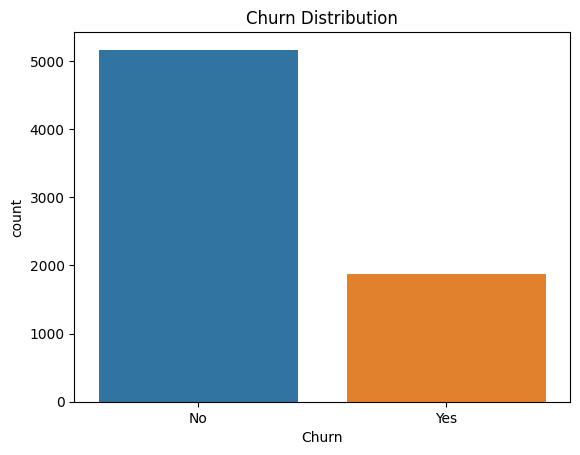

In [9]:
sns.countplot(x = 'Churn', data = df)
plt.title("Churn Distribution")
plt.show()

In [10]:
# 26% customers have churned.

# Churn by Categorical Features


Churn Rate by gender: 
Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


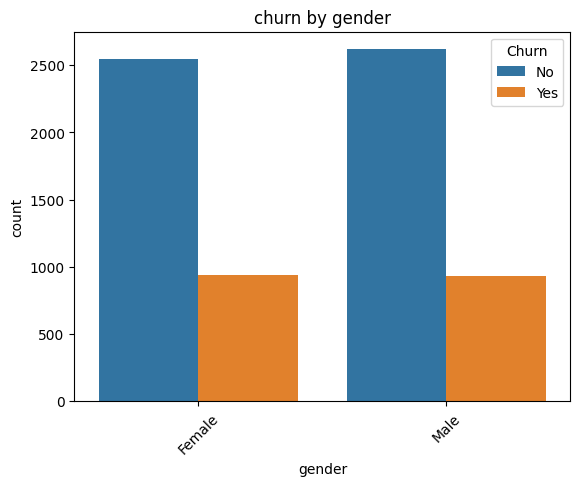


Churn Rate by SeniorCitizen: 
Churn                 No        Yes
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


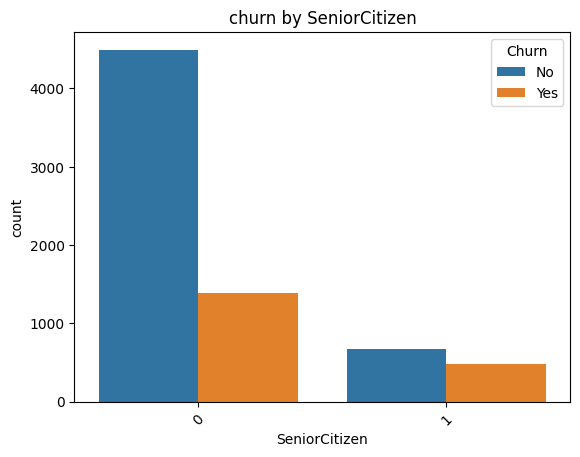


Churn Rate by Partner: 
Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


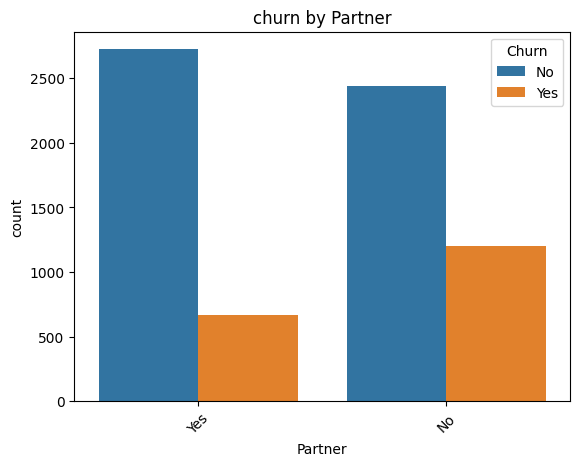


Churn Rate by Dependents: 
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


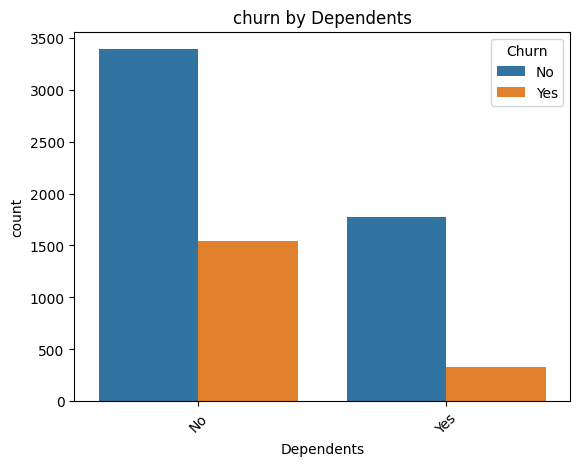


Churn Rate by PhoneService: 
Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


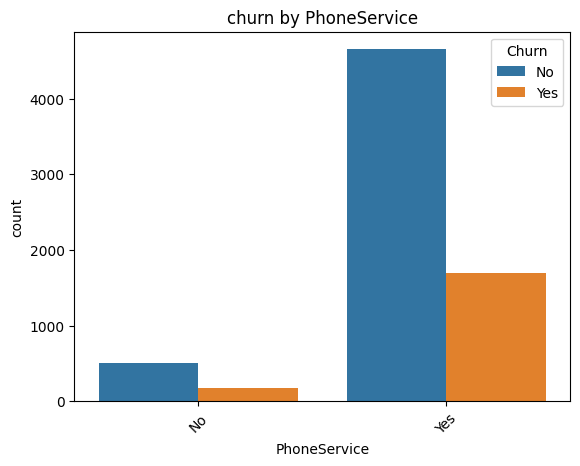


Churn Rate by MultipleLines: 
Churn                    No        Yes
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


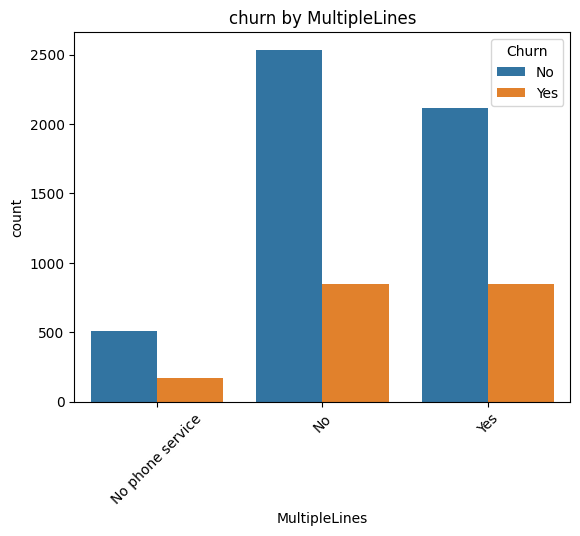


Churn Rate by InternetService: 
Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


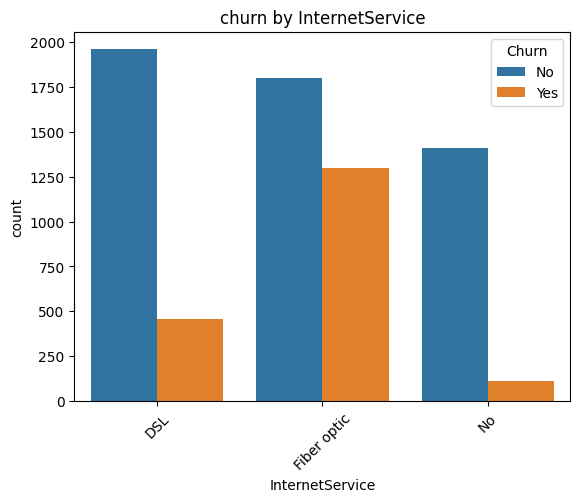


Churn Rate by OnlineSecurity: 
Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


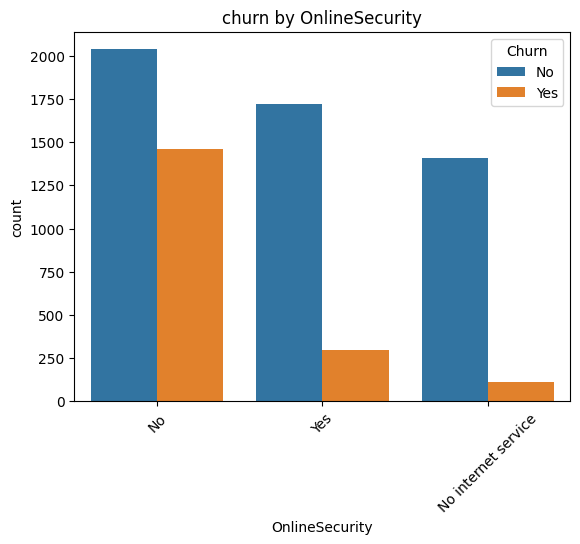


Churn Rate by OnlineBackup: 
Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


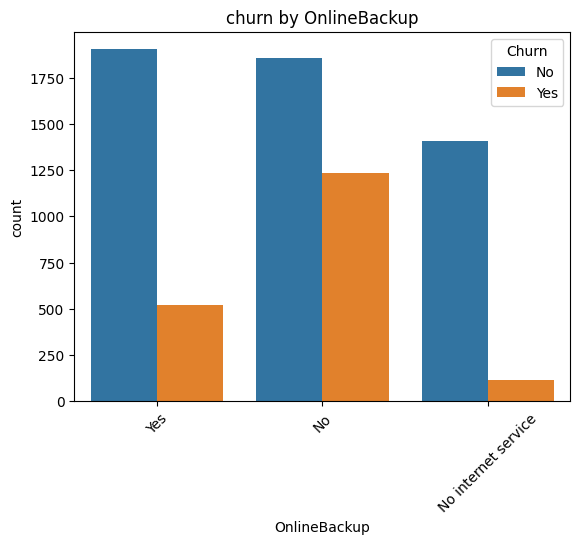


Churn Rate by DeviceProtection: 
Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


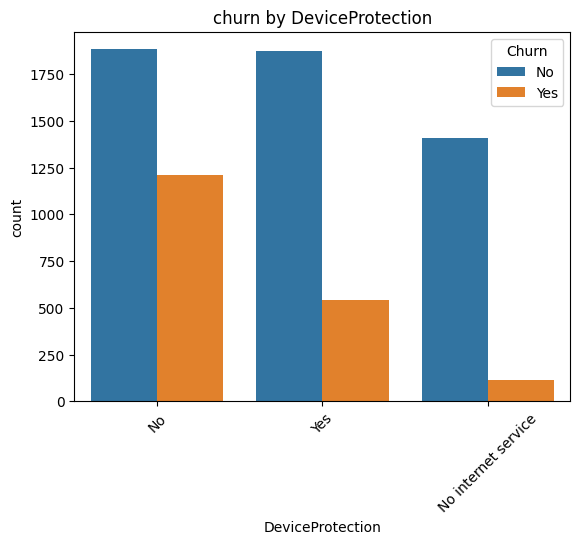


Churn Rate by TechSupport: 
Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


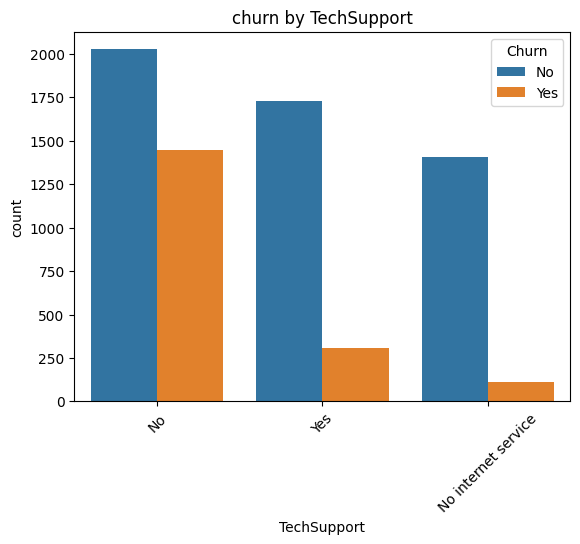


Churn Rate by StreamingTV: 
Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


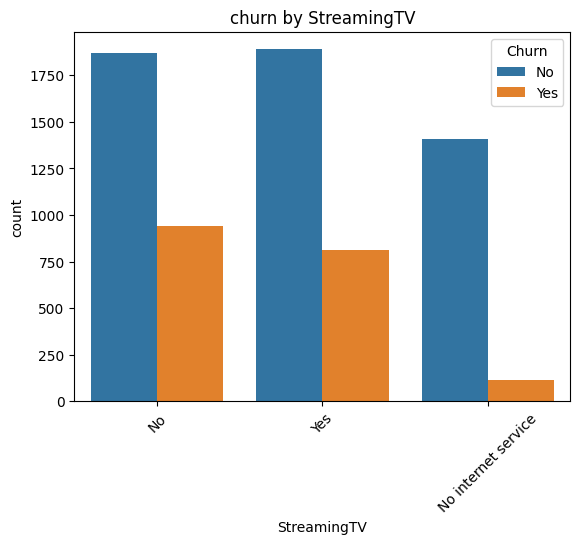


Churn Rate by StreamingMovies: 
Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


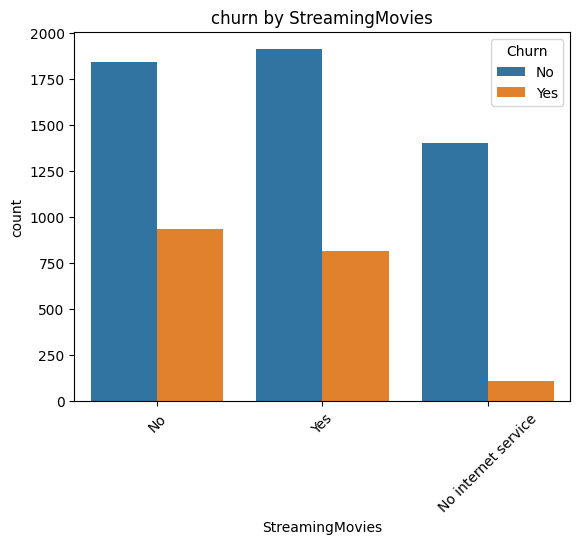


Churn Rate by Contract: 
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


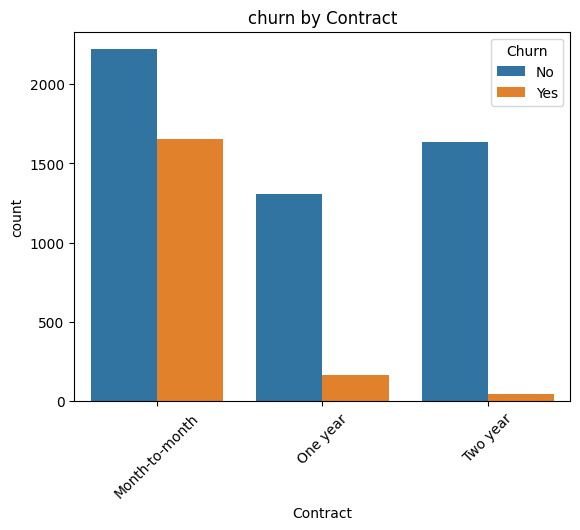


Churn Rate by PaperlessBilling: 
Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


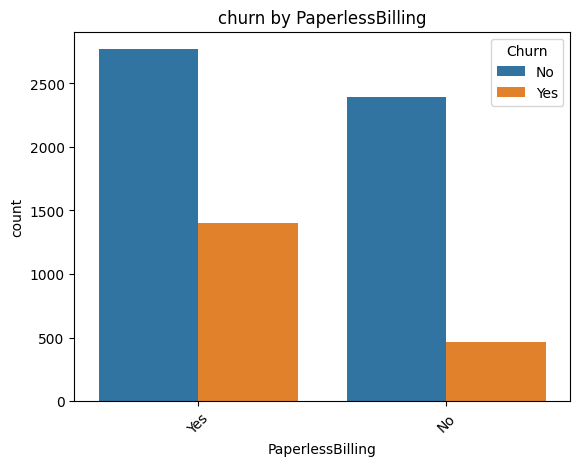


Churn Rate by PaymentMethod: 
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


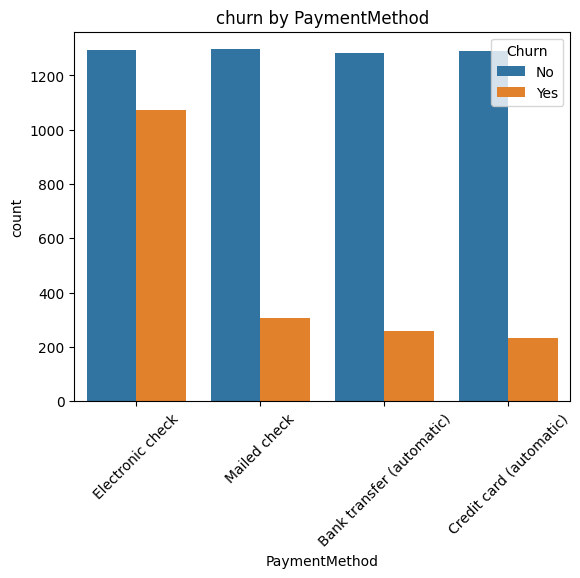

In [11]:
def churn_rate_by_feature(features):
    churn_table = pd.crosstab(df[features], df['Churn'], normalize = 'index') * 100
    print(f"\nChurn Rate by {features}: ")
    print(churn_table)

    sns.countplot(x = features, hue = 'Churn', data = df)
    plt.title(f"churn by {features}")
    plt.xticks(rotation=45)
    plt.show()

categorical_features = [
    'gender','SeniorCitizen','Partner','Dependents',
    'PhoneService','MultipleLines','InternetService',
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]

for features in categorical_features:
    churn_rate_by_feature(features)


In [12]:
# Month-to-month contracts → churn much higher
# Electronic check payment → churn spikes.
# Customers with extra services (security, support, backup) churn less. while with no security, support have higher)
# senior citizen - more churn

# Churn by Numerical Features

In [13]:
num_features = ['tenure','MonthlyCharges','TotalCharges']

for feature in num_features:
    print(f"\nAverage {feature} by churn: ")
    print(df.groupby('Churn')[feature].mean())


Average tenure by churn: 
Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

Average MonthlyCharges by churn: 
Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

Average TotalCharges by churn: 
Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64


In [14]:
# tenue low for churned customer
# higher-monthly charges causes more churn
# Total charges lower - (they left earlier)

# Statistical Tests

In [15]:
# Hypothesis 1: Contract type vs churn (chi-square)

contingency = pd.crosstab(df['Contract'],df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-square Contract vs Churn: chi2=%.2f, p=%.4f" % (chi2, p))

# Hypothesis 2: MonthlyCharges difference (T-test)

yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
no = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_val = stats.ttest_ind(yes, no)
print("T-test MonthlyCharges: t=%.2f, p=%.4f" % (t_stat, p_val))

Chi-square Contract vs Churn: chi2=1179.55, p=0.0000
T-test MonthlyCharges: t=16.48, p=0.0000


In [16]:
# p < 0.05 → Contract type and MonthlyCharges are significant churn drivers.

# Correlation Heatmap

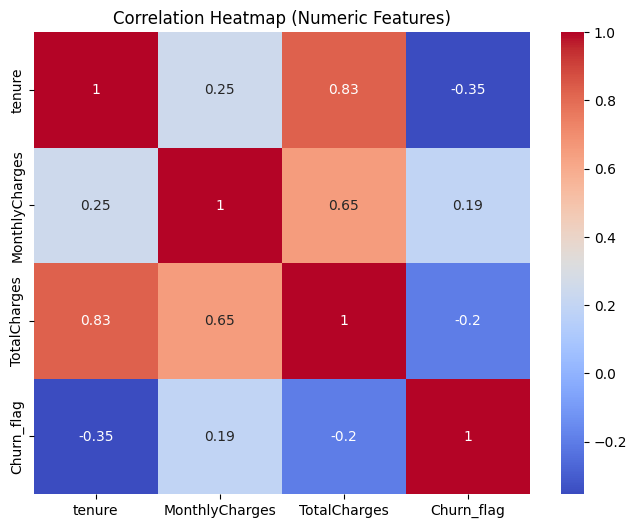

In [17]:
df['Churn_flag'] = df['Churn'].map({'Yes': 1, 'No': 0})

numeric_df = df[['tenure','MonthlyCharges','TotalCharges','Churn_flag']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [18]:
# Tenure (negative correlation) and MonthlyCharges (positive correlation) strongly linked with churn.

# Business Insights Summary

In [19]:
print(""" 
Key Insights:
1) Month-to-Month contracts have higher churns.
2) High monthly charges risk more churns.
3) Customer with more tenure are more loyal.
4) Customer who paying with electronics check the most churns.
5) Extra services (tech support, security, backup) reduce churn.

Business actions to take: 
encourage annual contacts, push autopay, promote value-add services.
""")

 
Key Insights:
1) Month-to-Month contracts have higher churns.
2) High monthly charges risk more churns.
3) Customer with more tenure are more loyal.
4) Customer who paying with electronics check the most churns.
5) Extra services (tech support, security, backup) reduce churn.

Business actions to take: 
encourage annual contacts, push autopay, promote value-add services.



# Predicting Churn with Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
df_model = df.copy()

In [22]:
# Drop ID and churn column

df_model = df_model.drop(columns=['customerID', 'Churn'])

In [23]:
# Encode categorical variables

for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])

In [24]:
# Feature (X) and Target (Y)

X = df_model.drop('Churn_flag', axis = 1)
y = df_model.Churn_flag

In [25]:
# Split train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
# Train logistic regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Prediction

y_pred = log_reg.predict(X_test)

In [28]:
# Evalute

#print("Accuracy:", accuracy)

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))



Confusion Matrix:

[[899 127]
 [163 218]]
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1026
           1       0.63      0.57      0.60       381

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [29]:
# Accuracy: ~80% (varies slightly).

# This model helps predict which customers are likely to churn next.